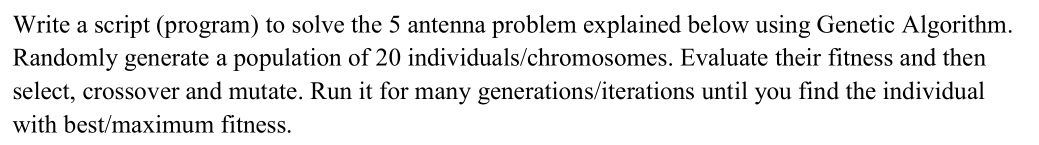

In [19]:
from IPython.display import Image
Image("Antenna.png")

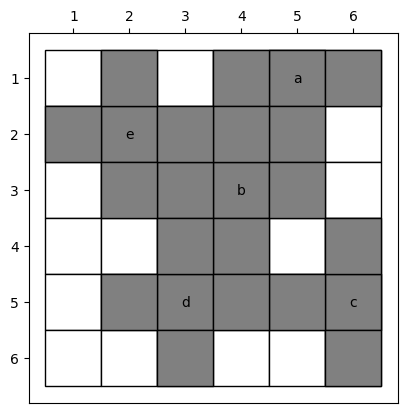

[[5, 1], [4, 3], [6, 5], [3, 5], [2, 2]]


fitness function is  23


In [43]:
#This is the best chromosome Plot we get.It is implemeneted using a custom Plot function
#this chromosome has fitness value of 23.

In [41]:
import random
import matplotlib.pyplot as plt

#this function creates a chromosome with random genes.
#It makes sure that every gene in the chromosome is different
def chromosome():
    selected=[]
    #this loop creates 5 genes
    for i in range(0,5):
        #this while loop makes sure that every gene is different
        keep_running=True
        while(keep_running==True):
            x=random.randint(1,6)
            y=random.randint(1,6)
            duplicate=False
            for i in range(0,len(selected)):
                if selected[i]==[x,y]:
                    duplicate=True
                    break
            if duplicate==True:
                keep_running=True
            else:
                keep_running=False
                selected.append([x,y])

    return selected

#this function gives the covered area coordinates of every antenna/gene
def area_covered(coord):
    list=[]
    list.append(coord)
    if ((coord[0]+1)<7):
        list.append([coord[0]+1,coord[1]])
    if((coord[0]-1)>0):
        list.append([coord[0]-1,coord[1]])
    if((coord[1]+1)<7):
        list.append([coord[0],coord[1]+1])
    if((coord[1]-1)>0):
        list.append([coord[0],coord[1]-1])
    return list

#this function removes duplicates from a list.It is used to remove a covered area coordinate
#if it is covered by more than one gene/antenna.
#this function is used in the successful calculation of fitness function
def remove_duplicates(list):
    new_list=[]
    for i in range(0,len(list)):
        check=True
        for n in new_list:
            if n==list[i]:
                check=False
        if check==True:
            new_list.append(list[i])
    return new_list

#this function calculates the fitness function of a chromosome
def fitness_function(population):
    total_area=[]
    for i in range(0,len(population)):
        num_area=area_covered(population[i])
        for j in range(0,len(num_area)):
            total_area.append(num_area[j])
    return len(remove_duplicates(total_area))

#this function creates a fitness array containing fitness functions of whole population
def create_fitness_array(population):
    fitness=[]
    for i in range(0,len(population)):
        fitness.append([i,fitness_function(population[i])])
    #fitness.sort(key=lambda x:x[1],reverse=True)
    return fitness

#this function selects parents for crossover
def selection(population):
    parents=[]
    fitness1=create_fitness_array(population)
    fitness1.sort(key=lambda x:x[1],reverse=True)
    for i in range(0,len(fitness1[-18:])):
        parents.append(population[fitness1[-18:][i][0]])
    index=[]
    for k in range(0,len(fitness1[-18:])):
        index.append(fitness1[-18:][k][0])
    parents.append(index)
    return parents

#this function gives children after crossover with parents
def crossover(a,b,n):
    children=[]
    children.append(a[:n]+b[n:])
    children.append(b[:n]+a[n:])
    return children

#this function mutates a chromosome by decrementing the y coordinate of every antenna/gene
def decrementer(chromosome):
    for i in range(0,len(chromosome)):
        if(chromosome[i][1]-1)>0:
            chromosome[i][1]=chromosome[i][1]-1
    return chromosome

#this function uses the decrementer function to mutate by selecting chromosomes of low fitness value
def mutate(population):
    fitness=create_fitness_array(population)
    fitness.sort(key=lambda x:x[1],reverse=True)
    for j in range(1,4):
        number_of_same_fitness=0
        n=0
        Keep_running=True
        while(Keep_running==True):
            if(fitness[-j][1]==fitness[-j-n-1][1]):
                number_of_same_fitness=number_of_same_fitness+1
                n=n+1
            else:
                Keep_running=False
        for i in range(0,number_of_same_fitness+1): 
            poor_index=fitness[-j-i][0]
            #item=decrementer(population[poor_index])
            #population.remove(population[poor_index])
            #population.append(item)
            population[poor_index]=decrementer(population[poor_index])
    return population

#this function plots the chromosome
def Plot(population):
    plt.axes()
    for i in range(1,7):
        for j in range(1,7):
            plt.gca().add_patch(plt.Rectangle((i-0.5,-j+0.5), 1, -1, fc='white',ec="black"))
    chrom=population
    alphabet=["a","b","c","d","e"]
    for k in range(0,len(chrom)):
        plt.gca().add_patch(plt.Rectangle((chrom[k][0]-0.5,-chrom[k][1]+0.5), 1, -1, fc='Gray',ec="black"))
        plt.text(chrom[k][0],-chrom[k][1], alphabet[k], horizontalalignment='center',verticalalignment='center')
    for l in range(0,len(population)):
        area=area_covered(population[l])
        for k in area:
            plt.gca().add_patch(plt.Rectangle((k[0]-0.5,-k[1]+0.5), 1, -1, fc='gray',ec="black"))
    
    plt.subplot().xaxis.tick_top()
    my_yticks = ['1','2','3','4','5','6']
    plt.yticks([-1,-2,-3,-4,-5,-6], my_yticks)
    plt.axis('scaled')
    plt.show()
    print(chrom)
    print("\n")
    print("fitness function is ",fitness_function(population))

#this creates a population array and populates it with chromosomes
population1=[]
for s in range(0,20):
    population1.append(chromosome())
population=population1.copy()

#this loop uses the above population created and selects parents,creates children,mutates and creates
#new population.
#this loop breaks when a chromosome with fitness value of 23 is reached or otherwise runs till 
#1000 loops
for q in range(0,1000):
    print("Generation#"+str(q))
    fitness_array=create_fitness_array(population)
    print("population")
    for i in range(0,len(population)):
        print(population[i]," fitness val=",fitness_array[i][1])
    
    print("parents")
    #this selects parents and puts them in parents array
    parents=selection(population)
    fitness_array_parents=create_fitness_array(parents[:-1])
    for j in range(0,len(parents[:-1])):
        print(parents[j]," fitness val= ",fitness_array_parents[j][1])
    print("childern")
    children=[]
    #this creates childrn and puts them in children array
    for f in range(0,len(parents)-1,2):
        n=random.randint(1,4)
        child=crossover(parents[f],parents[f+1],n)
        for part in child:
            children.append(part)
    fitness_array_children=create_fitness_array(children)
    for k in range(0,len(children)):
        print(children[k]," fitness val= ",fitness_array_children[k][1])
    for y in range(0,len(children)):
        population[parents[-1][y]]=children[y]
    fitness_array1=create_fitness_array(population)
    print("new population before mutation")
    for t in range(0,len(population)):
        print(population[t]," fitness val=",fitness_array1[t][1])
    #this mutates the population
    population=mutate(population)
    fitness_array2=create_fitness_array(population)
    print("new population after mutation")
    for w in range(0,len(population)):
        print(population[w]," fitness val=",fitness_array2[w][1])
    fitness_array2.sort(key=lambda x:x[1],reverse=True)
    #this if statment is used to break the main loop if a chromosome with fitness value of 23 
    #is reached.
    if(fitness_array2[0][1]==23):
        break

Generation#0
population
[[3, 2], [2, 4], [5, 5], [3, 6], [1, 3]]  fitness val= 21
[[6, 2], [3, 4], [1, 1], [3, 1], [3, 6]]  fitness val= 18
[[1, 5], [5, 4], [4, 3], [6, 4], [6, 2]]  fitness val= 17
[[5, 1], [3, 6], [5, 6], [3, 5], [1, 2]]  fitness val= 18
[[2, 1], [2, 6], [3, 5], [6, 2], [5, 3]]  fitness val= 18
[[2, 4], [4, 2], [5, 6], [1, 6], [5, 2]]  fitness val= 20
[[1, 5], [5, 2], [3, 3], [4, 4], [5, 5]]  fitness val= 20
[[2, 3], [1, 3], [2, 4], [3, 4], [2, 2]]  fitness val= 13
[[4, 4], [4, 2], [1, 3], [2, 6], [2, 3]]  fitness val= 20
[[6, 2], [4, 3], [2, 6], [5, 6], [3, 6]]  fitness val= 18
[[3, 3], [3, 6], [2, 5], [6, 3], [5, 6]]  fitness val= 19
[[2, 1], [3, 3], [4, 5], [6, 2], [3, 6]]  fitness val= 20
[[2, 1], [4, 3], [6, 5], [6, 3], [5, 6]]  fitness val= 17
[[4, 4], [1, 5], [5, 1], [4, 6], [2, 2]]  fitness val= 21
[[1, 1], [1, 2], [4, 6], [2, 1], [2, 4]]  fitness val= 15
[[5, 2], [1, 5], [5, 6], [4, 3], [4, 1]]  fitness val= 18
[[1, 6], [6, 5], [2, 1], [4, 1], [2, 2]]  fitnes

population
[[3, 2], [4, 3], [6, 5], [6, 3], [3, 3]]  fitness val= 16
[[6, 2], [1, 2], [3, 3], [4, 1], [5, 5]]  fitness val= 22
[[1, 5], [4, 3], [5, 6], [3, 6], [2, 4]]  fitness val= 19
[[5, 1], [1, 1], [5, 3], [4, 1], [3, 4]]  fitness val= 18
[[2, 1], [6, 4], [5, 6], [3, 4], [5, 5]]  fitness val= 18
[[2, 3], [3, 1], [4, 6], [6, 4], [5, 2]]  fitness val= 22
[[1, 5], [1, 1], [3, 5], [2, 6], [2, 2]]  fitness val= 15
[[2, 1], [4, 1], [4, 1], [6, 1], [2, 2]]  fitness val= 12
[[4, 1], [2, 1], [2, 1], [3, 1], [2, 1]]  fitness val= 8
[[6, 2], [6, 6], [5, 5], [4, 3], [5, 3]]  fitness val= 15
[[3, 1], [2, 4], [5, 6], [6, 1], [6, 1]]  fitness val= 16
[[2, 1], [3, 6], [5, 1], [4, 1], [1, 1]]  fitness val= 14
[[2, 1], [3, 5], [5, 6], [5, 5], [3, 3]]  fitness val= 19
[[4, 4], [1, 5], [3, 1], [3, 5], [3, 1]]  fitness val= 15
[[1, 1], [2, 1], [1, 1], [6, 1], [6, 1]]  fitness val= 8
[[5, 1], [5, 2], [2, 6], [6, 3], [1, 3]]  fitness val= 17
[[1, 5], [3, 1], [4, 3], [6, 2], [2, 2]]  fitness val= 20
[[5, 

new population after mutation
[[3, 2], [1, 1], [4, 6], [5, 5], [2, 4]]  fitness val= 20
[[6, 2], [1, 2], [3, 3], [4, 1], [5, 5]]  fitness val= 22
[[1, 5], [1, 4], [2, 5], [6, 3], [5, 2]]  fitness val= 15
[[5, 1], [4, 3], [5, 6], [2, 6], [2, 2]]  fitness val= 22
[[2, 1], [3, 1], [5, 6], [3, 6], [3, 3]]  fitness val= 17
[[2, 3], [4, 3], [5, 6], [3, 4], [2, 2]]  fitness val= 18
[[1, 5], [4, 1], [5, 5], [1, 6], [3, 4]]  fitness val= 19
[[2, 1], [5, 2], [5, 6], [4, 1], [1, 1]]  fitness val= 15
[[4, 1], [1, 1], [4, 1], [2, 1], [6, 1]]  fitness val= 10
[[6, 2], [2, 4], [2, 6], [4, 1], [5, 5]]  fitness val= 21
[[3, 1], [3, 1], [4, 3], [6, 4], [3, 3]]  fitness val= 15
[[2, 1], [6, 6], [3, 1], [6, 2], [3, 1]]  fitness val= 13
[[2, 1], [2, 1], [2, 1], [6, 1], [4, 1]]  fitness val= 9
[[4, 4], [3, 6], [6, 5], [3, 5], [5, 3]]  fitness val= 17
[[1, 1], [2, 1], [5, 1], [6, 1], [2, 1]]  fitness val= 10
[[5, 1], [6, 4], [2, 1], [6, 3], [1, 3]]  fitness val= 18
[[1, 5], [5, 4], [3, 5], [6, 1], [2, 2]]  f

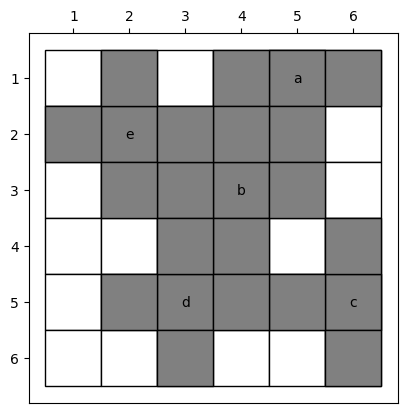

[[5, 1], [4, 3], [6, 5], [3, 5], [2, 2]]


fitness function is  23


In [42]:
#this Plots the best chromosome in the final population
#note i think the best fitness function is 23.In all my experiments
#i never got a fitness function of more than 23 except infinite loops
fitness_array=create_fitness_array(population)
fitness_array.sort(key=lambda x:x[1],reverse=True)
Plot(population[fitness_array[0][0]])